In [42]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import math
from multiprocessing import Pool
import functools

In [43]:
#reading in the file
df = pd.read_csv('hotel_bookings.csv', na_values=[' ', '-', 'Undefined', 'None'])
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [44]:
#converting the 'is_cancled' column to Boolean
df.is_canceled = df.is_canceled.astype(bool)

In [45]:
#converting the 'is_repeated_guest' column to Boolean
df.is_repeated_guest = df.is_repeated_guest.astype(bool)

In [46]:
# converting 'reservation_type_date' column to datetime types
df.reservation_status_date = pd.to_datetime(df.reservation_status_date)

In [47]:
# concatenating day, month and year columns into one
cols = ['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']
df['arrival_date'] = df[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
# converting 'arrival_date' column to datetime object
df.arrival_date =  pd.to_datetime(df.arrival_date, format='%Y_%B_%d')
# dropping the cols
df = df.drop(columns=cols)

In [48]:
# df['direct_booking'] = df[['agent', 'company']].isna().any(axis=1, skipna=False)
# df.loc[:,'agent':'direct_booking']
# lambda row:
# cols = df['agent', 'company']
df['direct_booking'] = df.apply(lambda row:False if row['agent'] > 0 else(False if  row['company'] > 0 else True),axis=1)

# def new_col_from_yes_no_in_other_cols(df, new_col, col1, col2):
#     df[new_col] = df.apply(lambda row: 'No' if row.col1 > 0
#     else ('No' if row.col2 > 0 else 'Yes'),axis=1)
# for each in df.head().iterrows():
#     print(each)
#     if each['agent'].isna() and each['company'].isna:
#         each['direct_booking'] = True
#     else:
#         each['direct_booking'] = False

In [49]:
df.direct_booking.value_counts(dropna=False)

False    109630
True       9760
Name: direct_booking, dtype: int64

In [50]:
df.arrival_date

0        2015-07-01
1        2015-07-01
2        2015-07-01
3        2015-07-01
4        2015-07-01
            ...    
119385   2017-08-30
119386   2017-08-31
119387   2017-08-31
119388   2017-08-31
119389   2017-08-29
Name: arrival_date, Length: 119390, dtype: datetime64[ns]

In [51]:
# sns.heatmap(df.isnull(), cbar=False)
# plt.title('Null Values')
# plt.show()

In [52]:
df['agent'].value_counts(dropna=False)

9.0      31961
NaN      16340
240.0    13922
1.0       7191
14.0      3640
         ...  
280.0        1
285.0        1
289.0        1
265.0        1
497.0        1
Name: agent, Length: 334, dtype: int64

In [53]:
df.agent.fillna(df.agent.mean(), inplace=True)
df.agent.value_counts(dropna=False)

9.000000      31961
86.693382     16340
240.000000    13922
1.000000       7191
14.000000      3640
              ...  
280.000000        1
285.000000        1
289.000000        1
265.000000        1
497.000000        1
Name: agent, Length: 334, dtype: int64

In [54]:
df.company.value_counts(dropna=False)

NaN      112593
40.0        927
223.0       784
67.0        267
45.0        250
          ...  
32.0          1
11.0          1
487.0         1
101.0         1
376.0         1
Name: company, Length: 353, dtype: int64

In [55]:
df.company.fillna(df.company.mean(), inplace=True)
df.company.value_counts(dropna=False)

189.266735    112593
40.000000        927
223.000000       784
67.000000        267
45.000000        250
               ...  
32.000000          1
11.000000          1
487.000000         1
101.000000         1
376.000000         1
Name: company, Length: 353, dtype: int64

In [56]:
nan_cols = df.columns[df.isna().any()].tolist()
df[nan_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   children              119386 non-null  float64
 1   meal                  118221 non-null  object 
 2   country               118902 non-null  object 
 3   market_segment        119388 non-null  object 
 4   distribution_channel  119385 non-null  object 
dtypes: float64(1), object(4)
memory usage: 4.6+ MB


In [57]:
df.meal.fillna('SC', inplace=True)

In [58]:
df.meal.value_counts(dropna=False)

BB    92310
HB    14463
SC    11819
FB      798
Name: meal, dtype: int64

In [59]:
df.children.value_counts(dropna=False)


0.0     110796
1.0       4861
2.0       3652
3.0         76
NaN          4
10.0         1
Name: children, dtype: int64

In [60]:
df.children.fillna(0, inplace=True)
df.children.value_counts(dropna=False)

0.0     110800
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [61]:
df['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [62]:
df.country.fillna('other', inplace=True)

In [63]:
df.market_segment.value_counts(dropna=False)

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
NaN                  2
Name: market_segment, dtype: int64

In [64]:
df.market_segment.fillna('Direct', inplace=True)

In [65]:
df.distribution_channel.value_counts(dropna=False)

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
NaN              5
Name: distribution_channel, dtype: int64

In [66]:
df.distribution_channel.fillna(method='ffill', inplace=True)

In [67]:
df.columns[df.isna().any()].tolist()


[]

In [68]:
# pip install sqlalchemy

<AxesSubplot:xlabel='lead_time'>

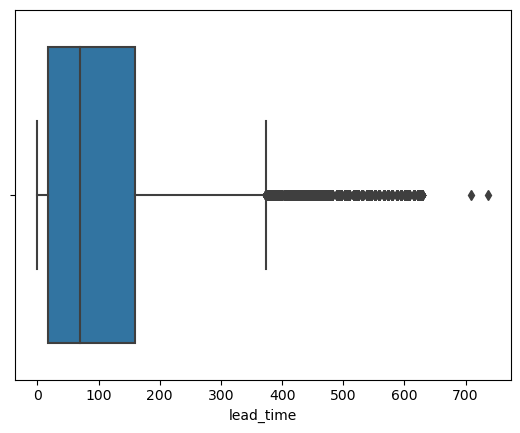

In [69]:
sns.boxplot(x = df['lead_time'])

In [70]:
# g = sns.JointGrid(data=df, x="babies", y="lead_time", marginal_ticks=True)
# g.ax_joint.set(yscale="log")
# # Create an inset legend for the histogram colorbar
# cax = g.figure.add_axes([.15, .55, .02, .2])

# # Add the joint and marginal histogram plots
# g.plot_joint(
#     sns.histplot, discrete=(True, False),
#     cmap="light:#03012d", pmax=.8, cbar=True, cbar_ax=cax
# )
# g.plot_marginals(sns.histplot, element="step", color="#03012d")



In [71]:

# sns.set_theme(style="ticks")

# Load the planets dataset and initialize the figure
# planets = sns.load_dataset("planets")
# g = sns.JointGrid(data=df, x="arrival_date", y="total_of_special_requests", marginal_ticks=True)

# # Set a log scaling on the y axis
# g.ax_joint.set(yscale="log")

# # Create an inset legend for the histogram colorbar
# cax = g.figure.add_axes([.15, .55, .02, .2])

# # Add the joint and marginal histogram plots
# g.plot_joint(
#     sns.histplot, discrete=(True, False),
#     cmap="light:#03012d", pmax=.8, cbar=True, cbar_ax=cax
# )
# g.plot_marginals(sns.histplot, element="step", color="#03012d")

In [72]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_week_number',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date',
       'direct_booking'],
      dtype='object')

Text(0, 0.5, '')

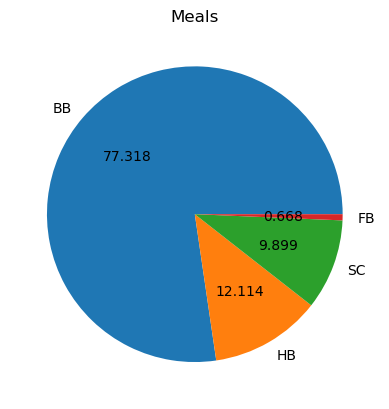

In [73]:
df['meal'].value_counts().plot.pie(autopct='%.3f')
plt.title('Meals')
plt.ylabel(None)

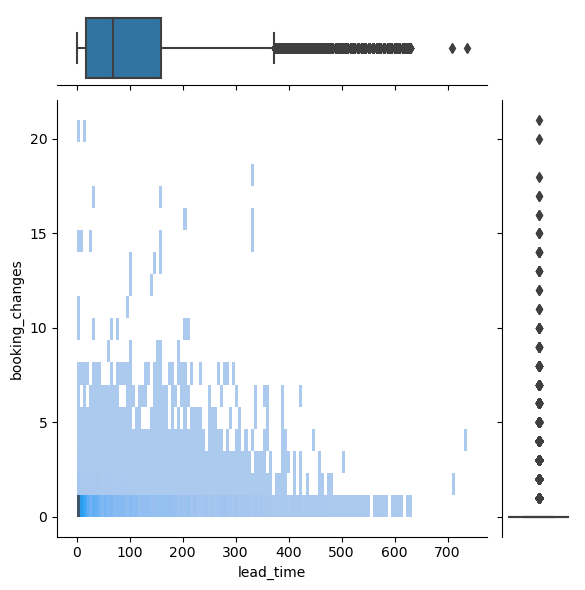

In [74]:
g = sns.JointGrid(data=df, x="lead_time", y="booking_changes")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

In [75]:
df.lead_time

0         342
1         737
2           7
3          13
4          14
         ... 
119385     23
119386    102
119387     34
119388    109
119389    205
Name: lead_time, Length: 119390, dtype: int64

In [76]:
lead_time_list = [3, 7, 23, 30, 50, 90, 120, 150, 300, 350]
def create_frequency_table(df, column):
    lead_time_frequency_dict = {}
    for n in lead_time_list:
        lead_time_frequency_dict[n] = 0#df[column].count(n).sum()
        for each in df[column]:
            if each == n:
                lead_time_frequency_dict[n] += 1
    return lead_time_frequency_dict

gh = create_frequency_table(df, 'lead_time')
print(gh)

{3: 1816, 7: 1331, 23: 643, 30: 659, 50: 527, 90: 293, 120: 252, 150: 322, 300: 93, 350: 98}


In [77]:
def make_chunks(data, num_chunks):
    chunk_size = math.ceil(len(data) / num_chunks)
    return [data[i:i+chunk_size] for i in range(0, len(data), chunk_size)]

In [78]:
# the map_reduce function
def map_reduce(data, num_processes, mapper, reducer):
    chunks = make_chunks(data, num_processes)
    pool = Pool(num_processes)
    chunk_results = pool.map(mapper, chunks)
    return functools.reduce(reducer, chunk_results)
# merging the dictionaries returned from previous function
def reducer_str(dict1, dict2):
    for d in dict2:
        if d in dict1:
            dict1[d] += dict2[d]
        else:
            dict1[d] = dict2[d]
    return dict1

target_count = map_reduce('lead_time', 8, create_frequency_table, reducer_str)
print(target_count)

In [79]:
df.customer_type.value_counts(dropna=False)

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64